In [ ]:
# Cell 1: Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from data_loader import load_housing_data
from model import train_model, predict
from evaluate import evaluate_regression


In [3]:
# Cell 2: Load & peek
df = load_housing_data()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


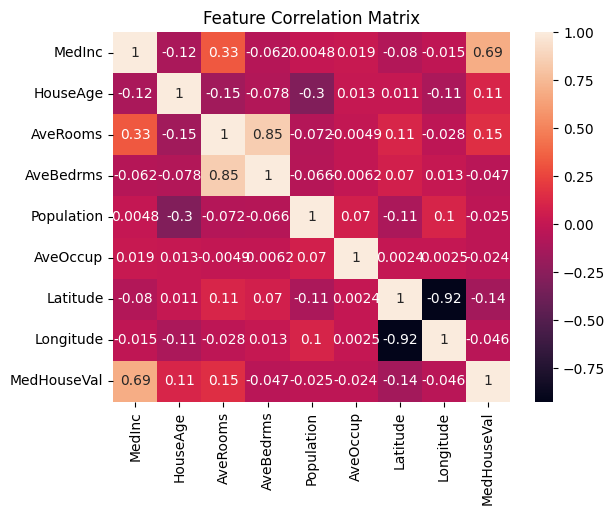

In [5]:
# Cell 3: Feature correlations
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.title("Feature Correlation Matrix")
plt.show()

In [12]:
# Cell 4: Split/train
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
model = train_model(X, y)

# Predictions on train set
y_pred = predict(model, X)
metrics = evaluate_regression(y, y_pred)
print("Train metrics:", metrics)

Train metrics: {'MSE': 0.5255248201587847, 'RMSE': np.float64(0.7249309071620444), 'R2': 0.6053286007096408}


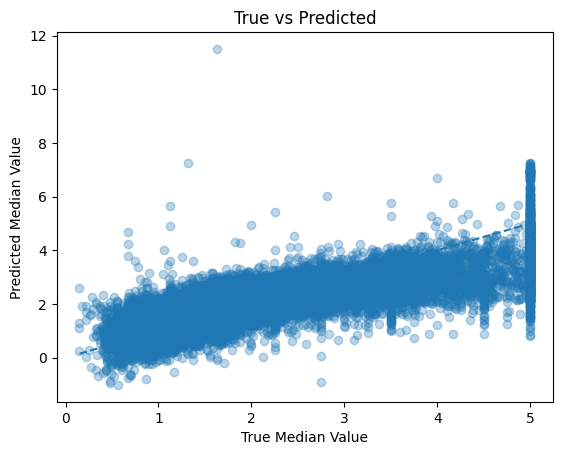

In [10]:
# Cell 5: Plot true vs predicted
plt.scatter(y, y_pred, alpha=0.3)
plt.xlabel("True Median Value")
plt.ylabel("Predicted Median Value")
plt.title("True vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--')
plt.show()
